In [3]:
import serial
import time

# Configure the serial port
arduino_port = 'COM6'  # Replace with your Arduino's serial port
baud_rate = 9600

# Open the serial connection
ser = serial.Serial(arduino_port, baud_rate, timeout=1)

try:
    while True:
        if ser.in_waiting > 0:
            # Read a line of data from the serial port
            line = ser.readline().decode('utf-8').strip()
            
            # Split the data into temperature and humidity
            data = line.split(',')
            if len(data) == 2:
                temperature = float(data[0])
                humidity = float(data[1])
                
                # Process the data (e.g., print or store it)
                print(f"Temperature: {temperature} °C, Humidity: {humidity}%")
        
        # Small delay to avoid overloading the CPU
        time.sleep(0.1)

except KeyboardInterrupt:
    print("Program terminated")

finally:
    ser.close()  # Close the serial connection

Temperature: 18.0 °C, Humidity: 61.0%
Temperature: 18.0 °C, Humidity: 61.0%
Temperature: 18.0 °C, Humidity: 62.0%
Temperature: 18.0 °C, Humidity: 62.0%
Temperature: 18.0 °C, Humidity: 62.0%
Temperature: 18.0 °C, Humidity: 62.0%
Temperature: 18.0 °C, Humidity: 62.0%
Temperature: 18.0 °C, Humidity: 62.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 18.0 °C, Humidity: 63.0%
Temperature: 17.0 °C, Humidity: 63.0%
Temperature: 17.0 °C, Humidity: 63.0%
Temperature: 17.0 °C, Humidity: 63.0%
Temperature: 17.0 °C, Humidity: 63.0%
Temperature: 17.0 °C, Humidity: 65.0%
Temperature: 18.0 °C, Humidity: 70.0%
Temperature: 18.0 °C, Humidity: 75.0%
Temperature: 18.0 °C, Humidity: 79.0%
Temperature:

In [6]:
import serial
import time

# Configure the serial connection
ser = serial.Serial('COM6', 9600, timeout=1)  # Replace 'COM3' with your Arduino's port

try:
    while True:
        if ser.in_waiting > 0:  # Check if there is data available to read
            data = ser.readline().decode('utf-8').strip()  # Read a line and decode it
            
            # Skip empty lines
            if not data:
                continue

            try:
                # Split the data into individual values
                ax, ay, az, temp, gx, gy, gz = map(float, data.split(','))

                # Print the received data
                print(f"Accelerometer (X, Y, Z): ({ax}, {ay}, {az})")
                print(f"Temperature: {temp}°C")
                print(f"Gyroscope (X, Y, Z): ({gx}, {gy}, {gz})")
                print("-" * 30)

            except ValueError:
                # Handle cases where the data cannot be split or converted to float
                print(f"Error: Received invalid data - '{data}'")

except KeyboardInterrupt:
    print("Exiting...")
finally:
    ser.close()  # Close the serial connection when done

Error: Received invalid data - '4,16368,20.48,-1,-164,-51'
Accelerometer (X, Y, Z): (-996.0, 56.0, 16112.0)
Temperature: 20.44°C
Gyroscope (X, Y, Z): (-42.0, -160.0, -23.0)
------------------------------
Accelerometer (X, Y, Z): (-928.0, 104.0, 16280.0)
Temperature: 20.44°C
Gyroscope (X, Y, Z): (-22.0, -174.0, -24.0)
------------------------------
Error: Received invalid data - '6300,20.39,-14,-179,-40'
Accelerometer (X, Y, Z): (-880.0, 144.0, 16368.0)
Temperature: 20.48°C
Gyroscope (X, Y, Z): (-1.0, -164.0, -51.0)
------------------------------
Accelerometer (X, Y, Z): (-996.0, 56.0, 16112.0)
Temperature: 20.44°C
Gyroscope (X, Y, Z): (-42.0, -160.0, -23.0)
------------------------------
Accelerometer (X, Y, Z): (-928.0, 104.0, 16280.0)
Temperature: 20.44°C
Gyroscope (X, Y, Z): (-22.0, -174.0, -24.0)
------------------------------
Accelerometer (X, Y, Z): (-776.0, 72.0, 16288.0)
Temperature: 20.39°C
Gyroscope (X, Y, Z): (-27.0, -173.0, -36.0)
------------------------------
Acceleromete

C:\Users\hamed\AppData\Local\Temp\ipykernel_19432\965766152.py:89: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_plot, interval=100)


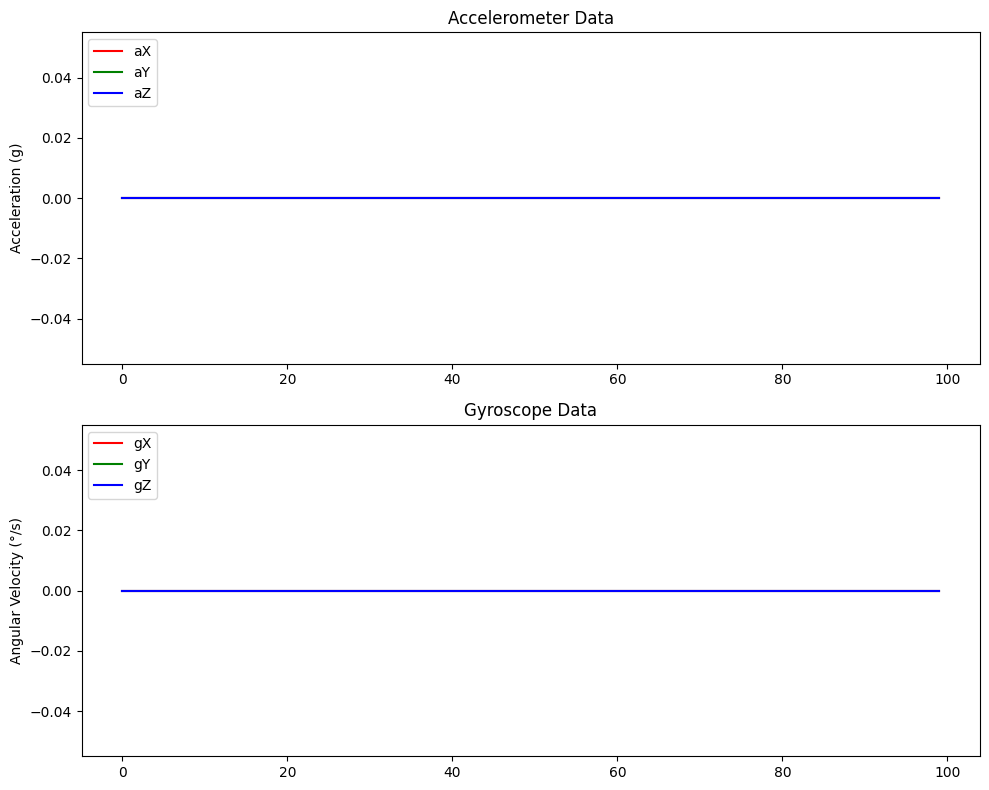

In [1]:
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

# Configure the serial connection
ser = serial.Serial('COM6', 9600, timeout=1)  # Replace 'COM3' with your Arduino's port

# Initialize deques to store the last N data points for plotting
N = 100  # Number of data points to display
ax_data = deque([0] * N, maxlen=N)
ay_data = deque([0] * N, maxlen=N)
az_data = deque([0] * N, maxlen=N)
gx_data = deque([0] * N, maxlen=N)
gy_data = deque([0] * N, maxlen=N)
gz_data = deque([0] * N, maxlen=N)

# Create a figure and subplots
fig, ((ax_acc, ax_gyro)) = plt.subplots(2, 1, figsize=(10, 8))
line_ax, = ax_acc.plot(ax_data, label="aX", color='r')
line_ay, = ax_acc.plot(ay_data, label="aY", color='g')
line_az, = ax_acc.plot(az_data, label="aZ", color='b')
line_gx, = ax_gyro.plot(gx_data, label="gX", color='r')
line_gy, = ax_gyro.plot(gy_data, label="gY", color='g')
line_gz, = ax_gyro.plot(gz_data, label="gZ", color='b')

# Set titles and labels
ax_acc.set_title("Accelerometer Data")
ax_acc.set_ylabel("Acceleration (g)")
ax_acc.legend(loc="upper left")
ax_gyro.set_title("Gyroscope Data")
ax_gyro.set_ylabel("Angular Velocity (°/s)")
ax_gyro.legend(loc="upper left")
plt.tight_layout()

def update_plot(frame):
    global ser
    if ser.in_waiting > 0:  # Check if there is data available to read
        data = ser.readline().decode('utf-8').strip()  # Read a line and decode it
        
        # Skip empty lines
        if not data:
            return line_ax, line_ay, line_az, line_gx, line_gy, line_gz

        try:
            # Split the data into individual values
            ax, ay, az, temp, gx, gy, gz = map(float, data.split(','))

            # Append new data to the deques
            ax_data.append(ax)
            ay_data.append(ay)
            az_data.append(az)
            gx_data.append(gx)
            gy_data.append(gy)
            gz_data.append(gz)

            # Update the plots
            line_ax.set_data(range(len(ax_data)), ax_data)
            line_ay.set_data(range(len(ay_data)), ay_data)
            line_az.set_data(range(len(az_data)), az_data)
            line_gx.set_data(range(len(gx_data)), gx_data)
            line_gy.set_data(range(len(gy_data)), gy_data)
            line_gz.set_data(range(len(gz_data)), gz_data)

            # Adjust the x-axis limits
            ax_acc.set_xlim(0, len(ax_data))
            ax_gyro.set_xlim(0, len(gx_data))

            # Adjust the y-axis limits based on the data range
            all_acc_data = ax_data + ay_data + az_data
            all_gyro_data = gx_data + gy_data + gz_data
            if all_acc_data:
                acc_min, acc_max = min(all_acc_data), max(all_acc_data)
                ax_acc.set_ylim(acc_min - 1, acc_max + 1)
            if all_gyro_data:
                gyro_min, gyro_max = min(all_gyro_data), max(all_gyro_data)
                ax_gyro.set_ylim(gyro_min - 10, gyro_max + 10)

        except ValueError:
            # Handle cases where the data cannot be split or converted to float
            print(f"Error: Received invalid data - '{data}'")
            # Return early to skip updating the plot for this frame
            return line_ax, line_ay, line_az, line_gx, line_gy, line_gz

    # If no valid data was received, just return the current plot state
    return line_ax, line_ay, line_az, line_gx, line_gy, line_gz

# Create the animation
ani = animation.FuncAnimation(fig, update_plot, interval=100)

try:
    plt.show()
except KeyboardInterrupt:
    print("Exiting...")
finally:
    ser.close()  # Close the serial connection when done

In [ ]:
import jax.numpy as jnp
import numpy as np
x=jnp.array([5,-2,1,10]).reshape((4,1))
jnp.clip(x,min=np.array([1,0,0,5]),max=np.array([10,10,10,9]))

Array([5, 0, 1, 9], dtype=int32)

In [7]:
jnp.full((4,), -10)

Array([-10, -10, -10, -10], dtype=int32, weak_type=True)